# Comparison Between the Microwave Uncertainty Framework and The Current Calibration Services Work Flow 05/2017 for a one-port 2.92mm system

This Notebook summarizes the comparison between using the current calibration services workflow and the microwave uncertainty framework to derive both nominal values and uncertainties. The data used in this comparison was acquired by Ron Ginley and ...

The comparison centers on the following data sources:
1. The measurement of devices C249R53, C292OD, __C29102__, __C29016__. C29102 and C29106 are check standards with historical data associated with them. 
2. Comparisons incorporate the raw values, a reference curve calculated from a previously culled data set (check standards only), a historical mean for all recorded measurements (check standards only), a historical median for all data sets (check standards only), the nominal value returned by the MUF, the mean of montecarlo values returned by the MUF.
3. Uncertainty calculations use calrep, a historical set of historical standard deviations, the sensitivity analysis from the MUF and the montecarlo analysis from the MUF.


In [1]:
from pyMeasure import *

Importing pyMeasure, this should take roughly 30 seconds
The module smithplot was not found,please put it on the python path
The module smithplot was not found,please put it on the python path


In [2]:
# file paths, must be set to run analysis


## The device C29102

### Data collected using a MultiCAL correction and MeasLP

In [3]:
raw_directory=r"C:\Share\292Comp\DUT_Meas\MeaslpX_results\ascii_results"
results_directory=r"C:\Share\resfiles"
montecarlo_directory=r"C:\Share\292Comp\DUT_Meas\C29102P1_Support\MonteCarlo"
sensitivity_directory=r"C:\Share\292Comp\DUT_Meas\C29102P1_Support\Covariance"
nominal_path=r"C:\Share\292Comp\DUT_Meas\C29102P1_Support\C29102P1_0.s2p"
one_port_measurement_csv=r"C:\Share\Converted_Check_Standard\Combined_One_Port_Check_Standard.csv"

In [4]:
C29102_raw_1=OnePortRawModel(os.path.join(raw_directory,"C29102.L4_122316"))
C29102_raw_2=OnePortRawModel(os.path.join(raw_directory,"C29102.L5_122316"))
C29102_calrep_1=calrep(C29102_raw_1)
C29102_calrep_2=calrep(C29102_raw_2)

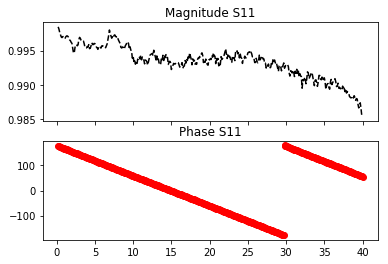

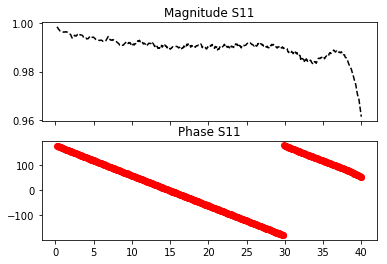

In [5]:
# The raw data
C29102_raw_1.show();
C29102_raw_2.show();

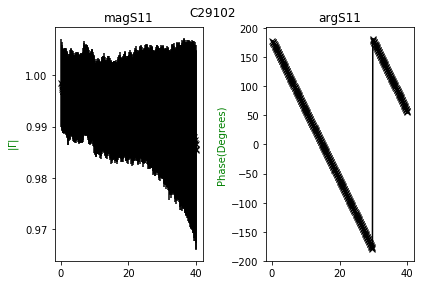

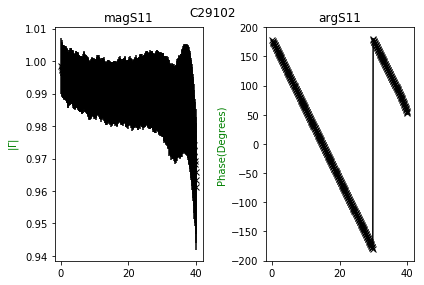

In [6]:
# The calrep data
plot_calrep(C29102_calrep_1);
plot_calrep(C29102_calrep_2);

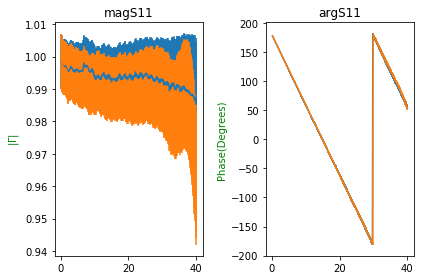

In [7]:
plot_calrep_comparison([C29102_calrep_1,C29102_calrep_2]);

In [8]:
# the old data base results
C29102_results=ResultFileModel(os.path.join(results_directory,"C29102"))

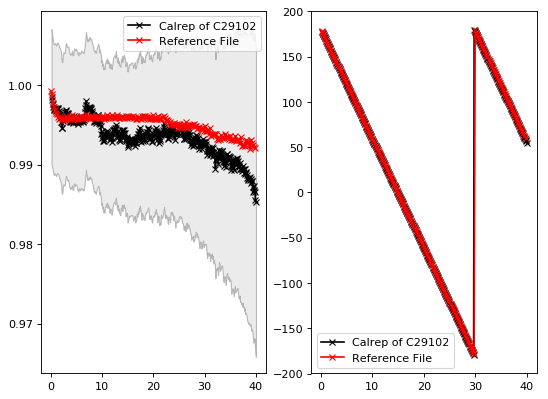

In [9]:
plot_calrep_results_comparison(calrep_model=C29102_calrep_1,results_model=C29102_results);

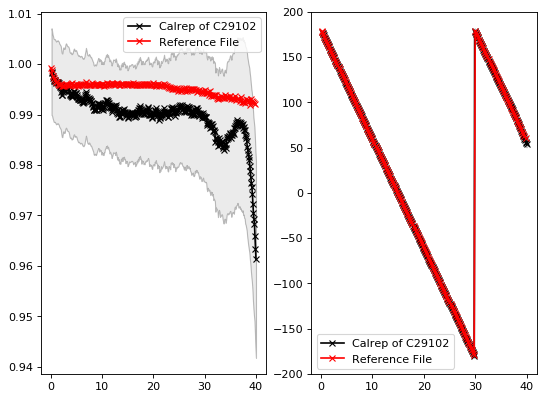

In [10]:
plot_calrep_results_comparison(calrep_model=C29102_calrep_2,results_model=C29102_results);

['float', 'float', 'float']


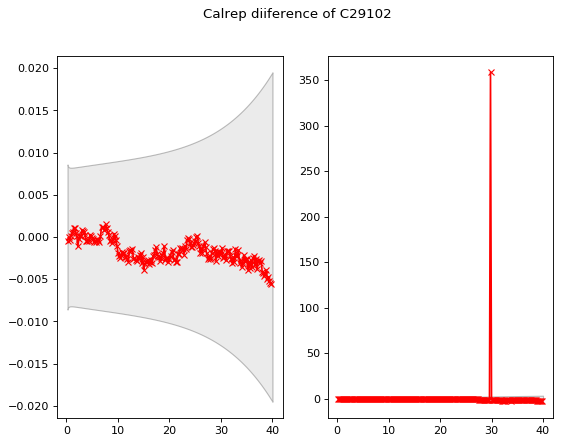

In [11]:
plot_calrep_results_difference_comparison(calrep_model=C29102_calrep_1,results_model=C29102_results);

['float', 'float', 'float']


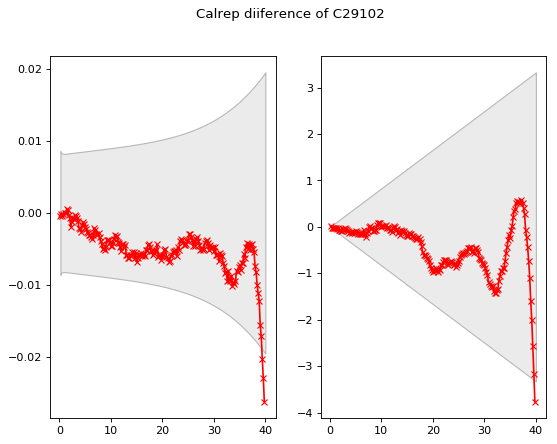

In [12]:
plot_calrep_results_difference_comparison(calrep_model=C29102_calrep_2,results_model=C29102_results);

In [13]:
# now we can open the MUF results
montecarlo_reference=create_monte_carlo_reference_curve(monte_carlo_directory=montecarlo_directory,format="MA")
sensitvity_reference=create_sensitivity_reference_curve(nominal_file_path=nominal_path,
                                                        sensitivity_directory=sensitivity_directory,format="MA")

['float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float

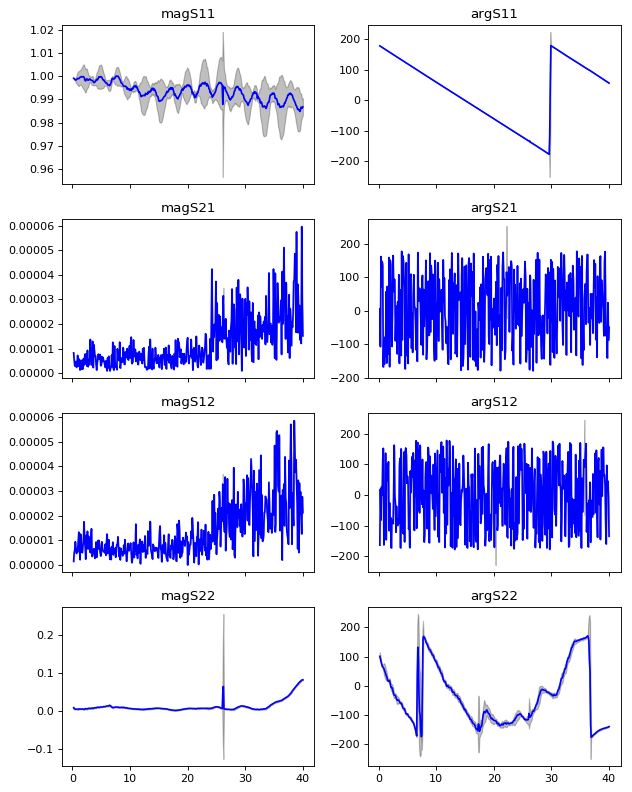

In [14]:
plot_reference_curve(montecarlo_reference);

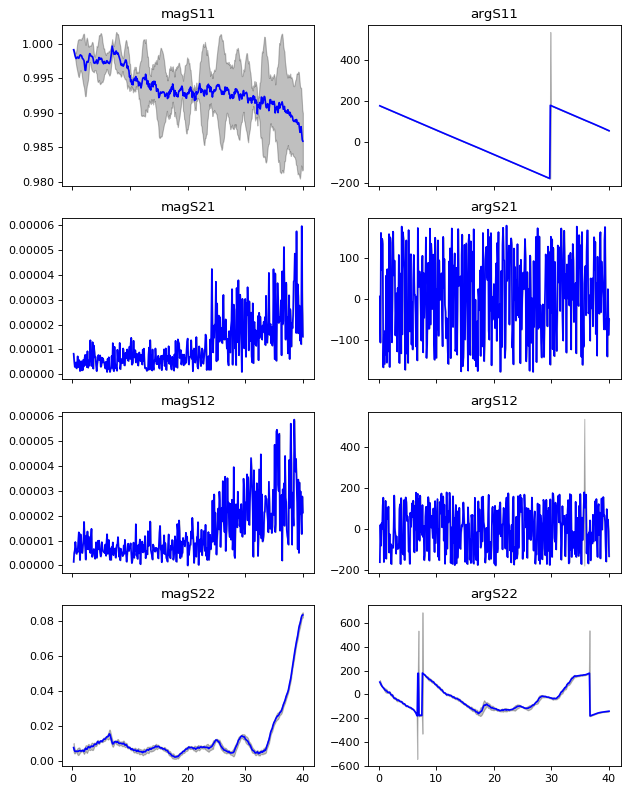

In [15]:
plot_reference_curve(sensitvity_reference);

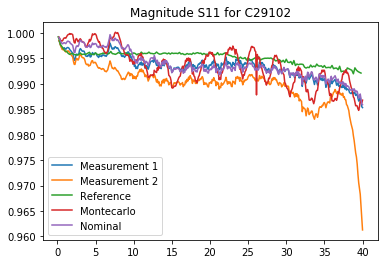

In [16]:
# Now we plot the measurements, results file, montecarlo, sensitivity all together
plt.close()

data_list=[C29102_calrep_1,C29102_calrep_2,C29102_results,montecarlo_reference,sensitvity_reference]
labels=["Measurement 1","Measurement 2","Reference","Montecarlo","Nominal"]
for index,data in enumerate(data_list):
    plt.plot(data["Frequency"],data["magS11"],label=labels[index])
plt.legend()
plt.title("Magnitude S11 for C29102")
plt.show();

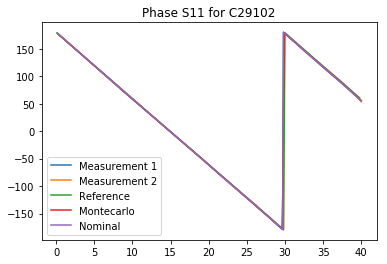

In [17]:
plt.close()

data_list=[C29102_calrep_1,C29102_calrep_2,C29102_results,montecarlo_reference,sensitvity_reference]
labels=["Measurement 1","Measurement 2","Reference","Montecarlo","Nominal"]
for index,data in enumerate(data_list):
    plt.plot(data["Frequency"],data["argS11"],label=labels[index])
plt.legend()
plt.title("Phase S11 for C29102")
plt.show();

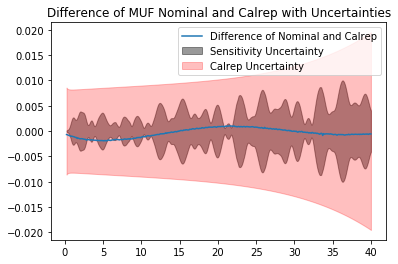

In [18]:
# now we can look at the difference of the nominal and the first measurement with their respective uncertainties
nominal_mag=np.array(sensitvity_reference["magS11"])
nominal_uncertainty=np.array(sensitvity_reference["umagS11"])
measurement_1_mag=np.array(C29102_calrep_1["magS11"])
measurement_1_uncertainty=np.array(C29102_calrep_1["uMgS11"])
plt.close()
plt.plot(sensitvity_reference["Frequency"],measurement_1_mag-nominal_mag,label="Difference of Nominal and Calrep")
plt.fill_between(sensitvity_reference["Frequency"] ,-1*nominal_uncertainty,nominal_uncertainty,
                        color="black",
                        alpha=.4,
                        edgecolor="black",label="Sensitivity Uncertainty")
plt.fill_between(sensitvity_reference["Frequency"] ,-1*measurement_1_uncertainty,measurement_1_uncertainty,
                        color="red",
                        alpha=.25,
                        edgecolor="red",label="Calrep Uncertainty")
plt.legend()
plt.title("Difference of MUF Nominal and Calrep with Uncertainties")
plt.show()


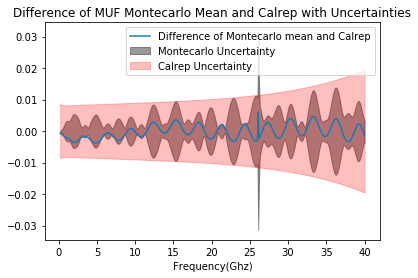

In [19]:
montecarlo_mag=np.array(montecarlo_reference["magS11"])
montecarlo_uncertainty=np.array(montecarlo_reference["umagS11"])
measurement_1_mag=np.array(C29102_calrep_1["magS11"])
measurement_1_uncertainty=np.array(C29102_calrep_1["uMgS11"])
plt.close()
plt.plot(montecarlo_reference["Frequency"],measurement_1_mag-montecarlo_mag,label="Difference of Montecarlo mean and Calrep")
plt.fill_between(sensitvity_reference["Frequency"] ,-1*montecarlo_uncertainty,montecarlo_uncertainty,
                        color="black",
                        alpha=.4,
                        edgecolor="black",label="Montecarlo Uncertainty")
plt.fill_between(sensitvity_reference["Frequency"] ,-1*measurement_1_uncertainty,measurement_1_uncertainty,
                        color="red",
                        alpha=.25,
                        edgecolor="red",label="Calrep Uncertainty")
plt.xlabel("Frequency(Ghz)")
plt.legend()
plt.title("Difference of MUF Montecarlo Mean and Calrep with Uncertainties")
plt.show()


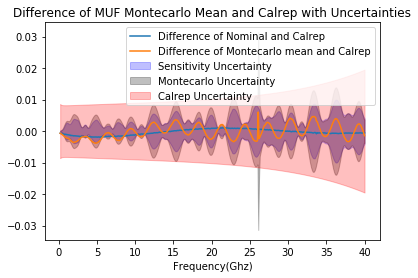

In [20]:
montecarlo_mag=np.array(montecarlo_reference["magS11"])
montecarlo_uncertainty=np.array(montecarlo_reference["umagS11"])
measurement_1_mag=np.array(C29102_calrep_1["magS11"])
measurement_1_uncertainty=np.array(C29102_calrep_1["uMgS11"])
nominal_mag=np.array(sensitvity_reference["magS11"])
nominal_uncertainty=np.array(sensitvity_reference["umagS11"])
plt.close()
plt.plot(sensitvity_reference["Frequency"],measurement_1_mag-nominal_mag,label="Difference of Nominal and Calrep")
plt.fill_between(sensitvity_reference["Frequency"] ,-1*nominal_uncertainty,nominal_uncertainty,
                        color="blue",
                        alpha=.25,
                        edgecolor="black",label="Sensitivity Uncertainty")
plt.plot(montecarlo_reference["Frequency"],measurement_1_mag-montecarlo_mag,label="Difference of Montecarlo mean and Calrep")
plt.fill_between(sensitvity_reference["Frequency"] ,-1*montecarlo_uncertainty,montecarlo_uncertainty,
                        color="black",
                        alpha=.25,
                        edgecolor="black",label="Montecarlo Uncertainty")
plt.fill_between(sensitvity_reference["Frequency"] ,-1*measurement_1_uncertainty,measurement_1_uncertainty,
                        color="red",
                        alpha=.25,
                        edgecolor="red",label="Calrep Uncertainty")
plt.xlabel("Frequency(Ghz)")
plt.legend()
plt.title("Difference of MUF Montecarlo Mean and Calrep with Uncertainties")
plt.show()

## The Device C29106

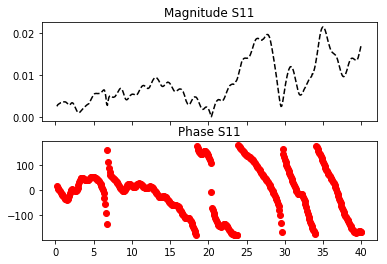

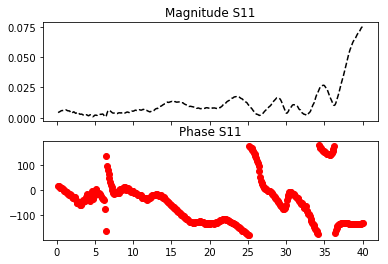

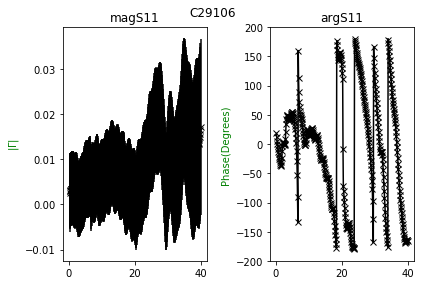

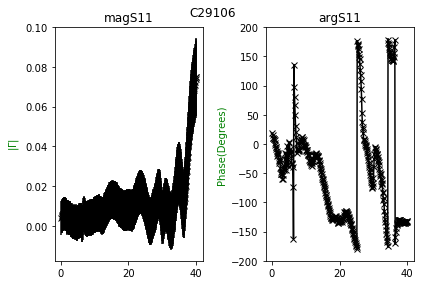

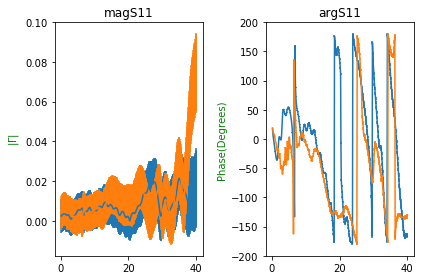

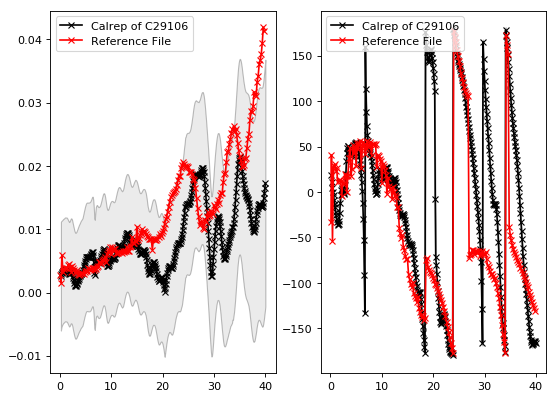

['float', 'float', 'float']


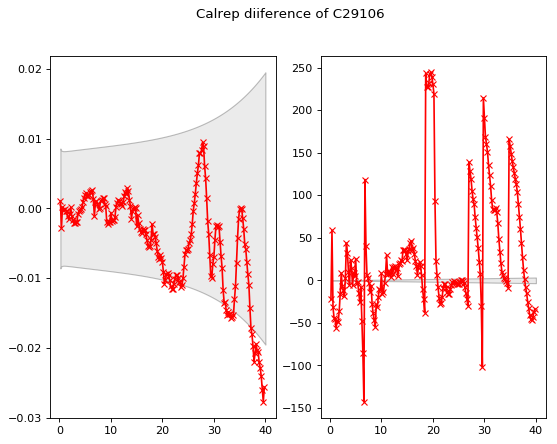

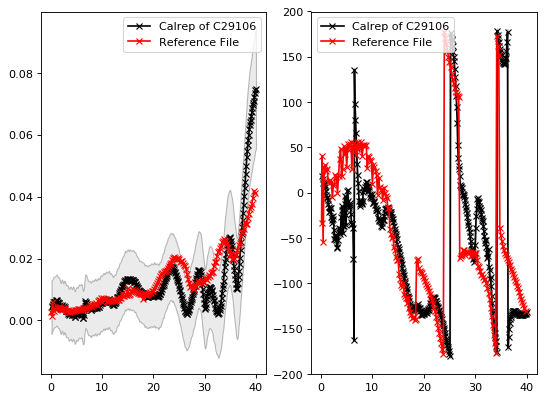

['float', 'float', 'float']


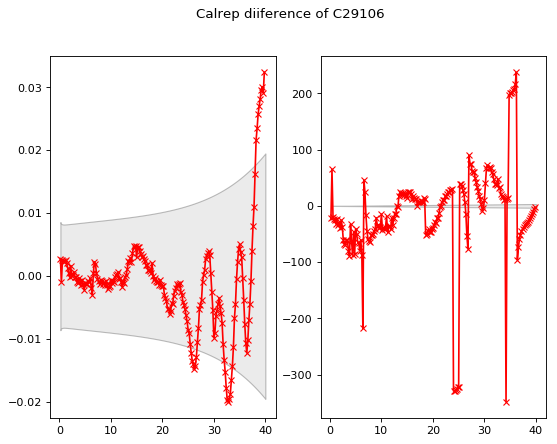

['float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float']
['float', 'float

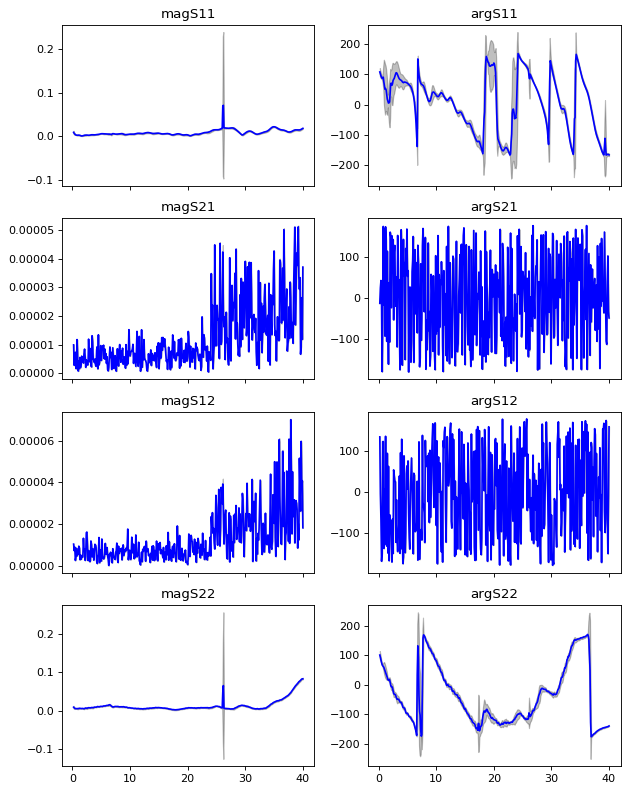

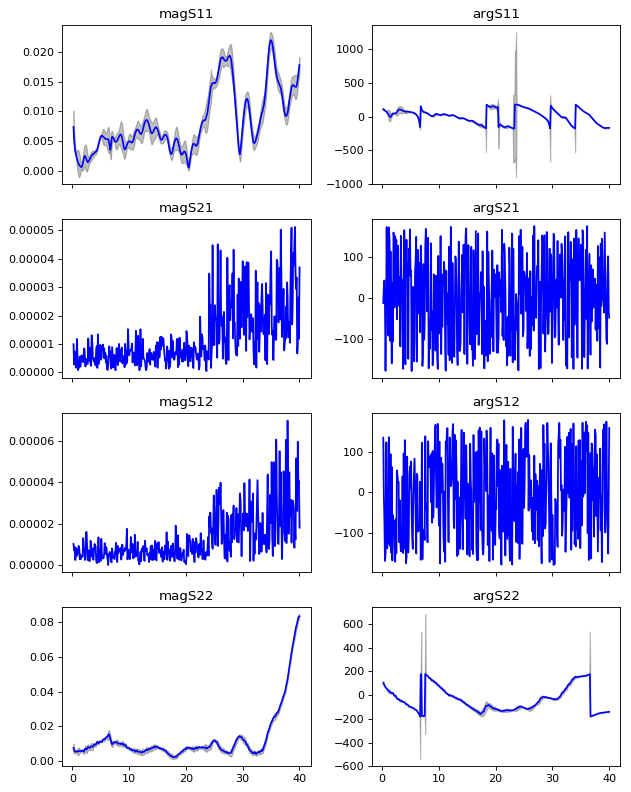

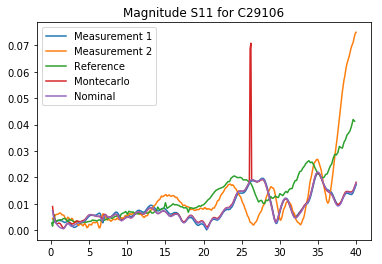

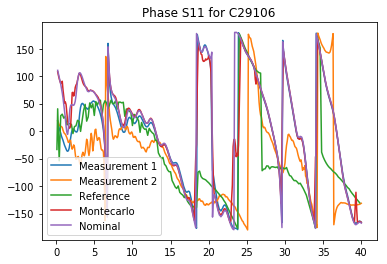

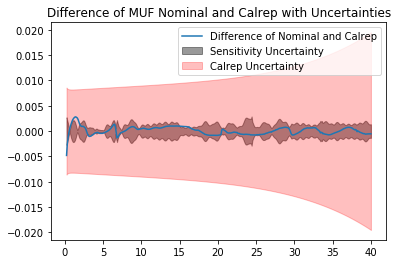

In [21]:
raw_directory=r"C:\Share\292Comp\DUT_Meas\MeaslpX_results\ascii_results"
results_directory=r"C:\Share\resfiles"
montecarlo_directory=r"C:\Share\292Comp\DUT_Meas\C29106P1_Support\MonteCarlo"
sensitivity_directory=r"C:\Share\292Comp\DUT_Meas\C29106P1_Support\Covariance"
nominal_path=r"C:\Share\292Comp\DUT_Meas\C29106P1_Support\C29106P1_0.s2p"
C29106_raw_1=OnePortRawModel(os.path.join(raw_directory,"C29106.L4_122316"))
C29106_raw_2=OnePortRawModel(os.path.join(raw_directory,"C29106.L5_122316"))
C29106_calrep_1=calrep(C29106_raw_1)
C29106_calrep_2=calrep(C29106_raw_2)
C29106_raw_1.show();
C29106_raw_2.show();
plot_calrep(C29106_calrep_1);
plot_calrep(C29106_calrep_2);
plot_calrep_comparison([C29106_calrep_1,C29106_calrep_2]);
C29106_results=ResultFileModel(os.path.join(results_directory,"C29106"))
plot_calrep_results_comparison(calrep_model=C29106_calrep_1,results_model=C29106_results);
plot_calrep_results_difference_comparison(calrep_model=C29106_calrep_1,results_model=C29106_results);
plot_calrep_results_comparison(calrep_model=C29106_calrep_2,results_model=C29106_results);
plot_calrep_results_difference_comparison(calrep_model=C29106_calrep_2,results_model=C29106_results);
# now we can open the MUF results
montecarlo_reference=create_monte_carlo_reference_curve(monte_carlo_directory=montecarlo_directory,format="MA")
sensitvity_reference=create_sensitivity_reference_curve(nominal_file_path=nominal_path,
                                                        sensitivity_directory=sensitivity_directory,format="MA")
plot_reference_curve(montecarlo_reference);
plot_reference_curve(sensitvity_reference);

# Now we plot the measurements, results file, montecarlo, sensitivity all together
plt.close()

data_list=[C29106_calrep_1,C29106_calrep_2,C29106_results,montecarlo_reference,sensitvity_reference]
labels=["Measurement 1","Measurement 2","Reference","Montecarlo","Nominal"]
for index,data in enumerate(data_list):
    plt.plot(data["Frequency"],data["magS11"],label=labels[index])
plt.legend()
plt.title("Magnitude S11 for C29106")
plt.show();

plt.close()

data_list=[C29106_calrep_1,C29106_calrep_2,C29106_results,montecarlo_reference,sensitvity_reference]
labels=["Measurement 1","Measurement 2","Reference","Montecarlo","Nominal"]
for index,data in enumerate(data_list):
    plt.plot(data["Frequency"],data["argS11"],label=labels[index])
plt.legend()
plt.title("Phase S11 for C29106")
plt.show();

# now we can look at the difference of the nominal and the first measurement with their respective uncertainties
nominal_mag=np.array(sensitvity_reference["magS11"])
nominal_uncertainty=np.array(sensitvity_reference["umagS11"])
measurement_1_mag=np.array(C29106_calrep_1["magS11"])
measurement_1_uncertainty=np.array(C29106_calrep_1["uMgS11"])
plt.close()
plt.plot(sensitvity_reference["Frequency"],measurement_1_mag-nominal_mag,label="Difference of Nominal and Calrep")
plt.fill_between(sensitvity_reference["Frequency"] ,-1*nominal_uncertainty,nominal_uncertainty,
                        color="black",
                        alpha=.4,
                        edgecolor="black",label="Sensitivity Uncertainty")
plt.fill_between(sensitvity_reference["Frequency"] ,-1*measurement_1_uncertainty,measurement_1_uncertainty,
                        color="red",
                        alpha=.25,
                        edgecolor="red",label="Calrep Uncertainty")
plt.legend()
plt.title("Difference of MUF Nominal and Calrep with Uncertainties")
plt.show()

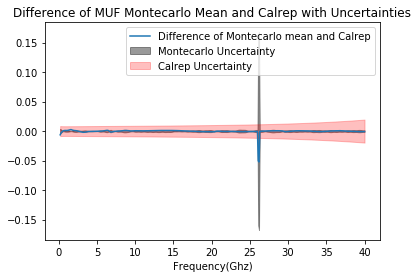

In [22]:
montecarlo_mag=np.array(montecarlo_reference["magS11"])
montecarlo_uncertainty=np.array(montecarlo_reference["umagS11"])
measurement_1_mag=np.array(C29106_calrep_1["magS11"])
measurement_1_uncertainty=np.array(C29106_calrep_1["uMgS11"])
plt.close()
plt.plot(montecarlo_reference["Frequency"],measurement_1_mag-montecarlo_mag,label="Difference of Montecarlo mean and Calrep")
plt.fill_between(sensitvity_reference["Frequency"] ,-1*montecarlo_uncertainty,montecarlo_uncertainty,
                        color="black",
                        alpha=.4,
                        edgecolor="black",label="Montecarlo Uncertainty")
plt.fill_between(sensitvity_reference["Frequency"] ,-1*measurement_1_uncertainty,measurement_1_uncertainty,
                        color="red",
                        alpha=.25,
                        edgecolor="red",label="Calrep Uncertainty")
plt.xlabel("Frequency(Ghz)")
plt.legend()
plt.title("Difference of MUF Montecarlo Mean and Calrep with Uncertainties")
plt.show()

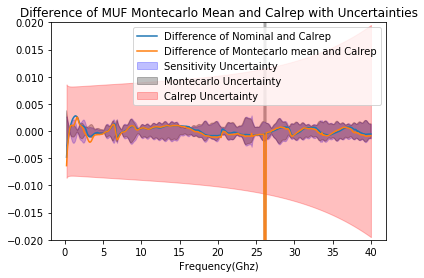

In [23]:
montecarlo_mag=np.array(montecarlo_reference["magS11"])
montecarlo_uncertainty=np.array(montecarlo_reference["umagS11"])
measurement_1_mag=np.array(C29106_calrep_1["magS11"])
measurement_1_uncertainty=np.array(C29106_calrep_1["uMgS11"])
nominal_mag=np.array(sensitvity_reference["magS11"])
nominal_uncertainty=np.array(sensitvity_reference["umagS11"])
plt.close()
plt.plot(sensitvity_reference["Frequency"],measurement_1_mag-nominal_mag,label="Difference of Nominal and Calrep")
plt.fill_between(sensitvity_reference["Frequency"] ,-1*nominal_uncertainty,nominal_uncertainty,
                        color="blue",
                        alpha=.25,
                        edgecolor="black",label="Sensitivity Uncertainty")
plt.plot(montecarlo_reference["Frequency"],measurement_1_mag-montecarlo_mag,label="Difference of Montecarlo mean and Calrep")
plt.fill_between(sensitvity_reference["Frequency"] ,-1*montecarlo_uncertainty,montecarlo_uncertainty,
                        color="black",
                        alpha=.25,
                        edgecolor="black",label="Montecarlo Uncertainty")
plt.fill_between(sensitvity_reference["Frequency"] ,-1*measurement_1_uncertainty,measurement_1_uncertainty,
                        color="red",
                        alpha=.25,
                        edgecolor="red",label="Calrep Uncertainty")
plt.xlabel("Frequency(Ghz)")
plt.legend()
plt.title("Difference of MUF Montecarlo Mean and Calrep with Uncertainties")
plt.ylim([-.02,.02])
plt.show()

In [24]:
diff=measurement_1_mag-montecarlo_mag
min_diff=min(diff)
position=diff.tolist().index(min_diff)
f=C29106_calrep_1["Frequency"]
f[position]

26.2

In [25]:
C29106_calrep_1.metadata

{'Calibration_Date': '',
 'Calibration_Name': 'c050211.a2',
 'Connector_Type_Calibration': '',
 'Connector_Type_Measurement': '2.92',
 'Device_Description': 'comp test on P1',
 'Device_Id': 'C29106',
 'Measurement_Date': '23 Dec 2016',
 'Measurement_Time': '11:30:09',
 'Measurement_Type': '1-port',
 'Nbs': '1',
 'Number_Connects': '1',
 'Number_Frequencies': '399',
 'Number_Repeats': '1',
 'Operator': 'RAG',
 'Port_Used': '1',
 'Program_Revision': '150122',
 'Program_Used': 'MEASLP',
 'Start_Frequency': '7',
 'System_Id': 'HP8510',
 'System_Letter': 'L'}